In [1]:
import numpy as np
import random
from sklearn import tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import graphviz
import pandas as pd
from sklearn.metrics import confusion_matrix

# mount your Google Drive, so that you can read data from it.
# Note: it needs your authorization.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-white.csv",sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# shuffle
data = data.sample(frac=1).reset_index(drop=True)

label_data = data['quality'] # labels of  data
# split the data into 80-20
index_div = int(len(data) * 0.8) 
# divide the data
train = data.loc[:index_div] 
test = data.loc[index_div:] 

test_X = test.iloc[:,0:10]
test_y = test['quality']
train_val_X = train.iloc[:,0:10]
train_val_y = train['quality']

print(len(train), len(test))
print(len(label_data))
print(len(train_val_X),len(train_val_y))

3919 980
4898
3919 3919


Depth:  10
Training accuracy:  74.48317425056146 %
Validation accuracy:  53.45726796465713 %
Depth:  20
Training accuracy:  99.60452267031215 %
Validation accuracy:  57.718384288581326 %
Depth:  21
Training accuracy:  99.70020221007063 %
Validation accuracy:  57.89721635780748 %
Depth:  22
Training accuracy:  99.82777764215734 %
Validation accuracy:  57.463282247765 %
Depth:  23
Training accuracy:  99.92983880154934 %
Validation accuracy:  57.59096358850053 %
Depth:  24
Training accuracy:  99.98724489795919 %
Validation accuracy:  57.7185146089087 %
Depth:  25
Training accuracy:  99.98724489795919 %
Validation accuracy:  57.74405739307217 %
Depth:  26
Training accuracy:  100.0 %
Validation accuracy:  57.7185146089087 %
Depth:  27
Training accuracy:  100.0 %
Validation accuracy:  57.7185146089087 %
Depth:  28
Training accuracy:  100.0 %
Validation accuracy:  57.7185146089087 %
Depth:  29
Training accuracy:  100.0 %
Validation accuracy:  57.7185146089087 %
Depth:  30
Training accuracy:  

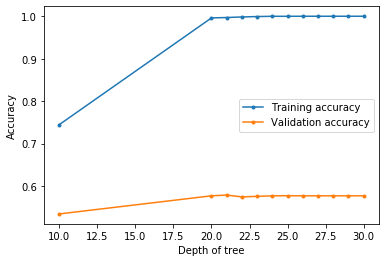

In [4]:
def dtc_parameter_tune(tain_val_X, train_val_y):
    depths = [10,20,21,22,23,24,25,26,27,28,29,30]
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for depth in depths:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]
            
            dtc = tree.DecisionTreeClassifier(max_depth=depth,random_state=0,
                                              criterion='entropy')
            dtc.fit(train_X, train_y)
            train_acc.append(dtc.score(train_X, train_y))
            val_acc.append(dtc.score(val_X, val_y))
            
        avg_train_acc = sum(train_acc) / len(train_acc) # compute the average training accuracy of K-folds CV
        avg_val_acc = sum(val_acc) / len(val_acc) # compute the average validation accuracy of K-folds CV
        print("Depth: ", depth)
        print("Training accuracy: ", avg_train_acc * 100, "%")
        print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return depths, train_acc_all, val_acc_all

depths, train_acc_all, val_acc_all = dtc_parameter_tune(train_val_X,train_val_y)

# plot training/validation curves
plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.legend()

In [5]:
# find the best depth based onn max validation %
best_index = val_acc_all.index(max(val_acc_all))
best_depth = depths[best_index]
dtc = tree.DecisionTreeClassifier(max_depth=best_depth,random_state=0,
                                  criterion='entropy')
dtc.fit(train_val_X,train_val_y)
train_acc = dtc.score(train_val_X, train_val_y)
test_acc = dtc.score(test_X, test_y)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

print("=========================================")
print("Best depth: ", best_depth)
print("Training accuracy: ", train_acc * 100, "%")
print("Test accuracy: ", test_acc * 100, "%")
print("mean accuracy", np.mean(val_acc_all)* 100, "%")

Best depth:  21
Training accuracy:  99.74483286552692 %
Test accuracy:  60.61224489795919 %
mean accuracy 57.34852162448632 %


Estimator:  10
Training accuracy:  98.60296846011131 %
Validation accuracy:  63.23044543487894 %
Estimator:  20
Training accuracy:  99.79586140676368 %
Validation accuracy:  65.27175046263716 %
Estimator:  25
Training accuracy:  99.94896535169092 %
Validation accuracy:  65.7566072405974 %
Estimator:  30
Training accuracy:  99.95534493701787 %
Validation accuracy:  65.73067349545182 %
Estimator:  31
Training accuracy:  99.96810614197832 %
Validation accuracy:  66.11371751765842 %
Estimator:  32
Training accuracy:  99.97448369299873 %
Validation accuracy:  66.31779915031146 %
Estimator:  33
Training accuracy:  99.98086531263223 %
Validation accuracy:  65.93495060859593 %
Estimator:  34
Training accuracy:  99.97448369299873 %
Validation accuracy:  65.8330726926786 %
Estimator:  35
Training accuracy:  99.9936224489796 %
Validation accuracy:  65.90947298459614 %
Estimator:  36
Training accuracy:  100.0 %
Validation accuracy:  65.75634659994266 %
Estimator:  37
Training accuracy:  100.0 %
Va

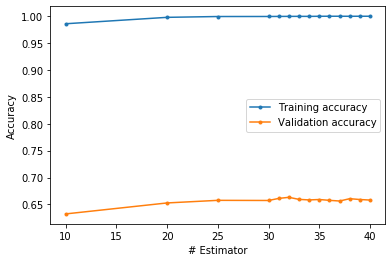

In [6]:
def clf_parameter_tune(tain_val_X, train_val_y):
    n_estimators = [10,20,25,30,31,32,33,34,35,36,37,38,39,40]
    train_acc_all = []
    val_acc_all = []

    kf = KFold(n_splits = 5)
    for estimator in n_estimators:
        train_acc = []
        val_acc = []
        for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]

            train_y = train_val_y[train_index]
            val_y = train_val_y[val_index]
            
            clf = RandomForestClassifier(n_estimators=estimator,random_state=0,
                                         criterion='entropy')
            clf.fit(train_X, train_y)
            train_acc.append(clf.score(train_X, train_y))
            val_acc.append(clf.score(val_X, val_y))
            
        avg_train_acc = sum(train_acc) / len(train_acc) # compute the average training accuracy of K-folds CV
        avg_val_acc = sum(val_acc) / len(val_acc) # compute the average validation accuracy of K-folds CV
        print("Estimator: ", estimator)
        print("Training accuracy: ", avg_train_acc * 100, "%")
        print("Validation accuracy: ", avg_val_acc * 100, "%")

        train_acc_all.append(avg_train_acc)
        val_acc_all.append(avg_val_acc)

    return n_estimators, train_acc_all, val_acc_all

n_estimators, train_acc_all, val_acc_all = clf_parameter_tune(train_val_X, train_val_y)

# plot training/validation curves
plt.plot(n_estimators, train_acc_all, marker='.', label="Training accuracy")
plt.plot(n_estimators, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('# Estimator')
plt.ylabel('Accuracy')
plt.legend()

In [7]:
# find the best estimator based on max validation %
best_index = val_acc_all.index(max(val_acc_all))
best_estimator = n_estimators[best_index]
clf = RandomForestClassifier(n_estimators=best_estimator,random_state=0,
                             criterion='entropy')
clf.fit(train_val_X,train_val_y)
train_acc = clf.score(train_val_X, train_val_y)
test_acc = clf.score(test_X, test_y)

print("=========================================")
print("Best estimator: ", best_estimator)
print("Training accuracy: ", train_acc * 100, "%")
print("Test accuracy: ", test_acc * 100, "%")
print("mean accuracy", np.mean(val_acc_all)* 100, "%")

Best estimator:  32
Training accuracy:  99.92344985965808 %
Test accuracy:  68.9795918367347 %
mean accuracy 65.66162699343559 %


In [ ]:
# Mean accuracy for Random Forest is higher than that of 
# Decision Tree

Confusion matrix, without normalization
[[  0   1   2   1   1   0   0]
 [  0   6  18   7   1   1   0]
 [  1  11 195  76  20   3   0]
 [  0   6  81 265  72  13   0]
 [  0   2  14  37 107   4   0]
 [  0   0   1   6   5  21   0]
 [  0   0   0   0   2   0   0]]
Normalized confusion matrix
[[0.         0.2        0.4        0.2        0.2        0.
  0.        ]
 [0.         0.18181818 0.54545455 0.21212121 0.03030303 0.03030303
  0.        ]
 [0.00326797 0.03594771 0.6372549  0.24836601 0.06535948 0.00980392
  0.        ]
 [0.         0.01372998 0.18535469 0.60640732 0.16475973 0.02974828
  0.        ]
 [0.         0.01219512 0.08536585 0.22560976 0.65243902 0.02439024
  0.        ]
 [0.         0.         0.03030303 0.18181818 0.15151515 0.63636364
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]]


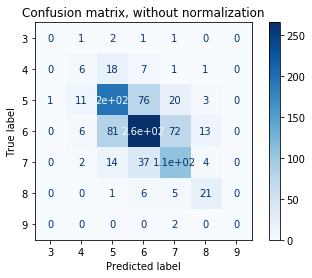

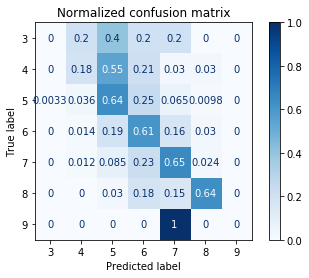

In [9]:
# Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix
# confusion matrix for Decision tree
# normalized matrix is better for showing the accuracy 
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dtc, test_X, test_y,
                                 display_labels=['3','4','5','6','7','8','9'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[  0   0   1   4   0   0   0]
 [  0   5  20   7   1   0   0]
 [  0   1 212  90   3   0   0]
 [  0   2  69 338  28   0   0]
 [  0   0   3  55 105   1   0]
 [  0   0   0  12   5  16   0]
 [  0   0   0   0   2   0   0]]
Normalized confusion matrix
[[0.         0.         0.2        0.8        0.         0.
  0.        ]
 [0.         0.15151515 0.60606061 0.21212121 0.03030303 0.
  0.        ]
 [0.         0.00326797 0.69281046 0.29411765 0.00980392 0.
  0.        ]
 [0.         0.00457666 0.15789474 0.77345538 0.06407323 0.
  0.        ]
 [0.         0.         0.01829268 0.33536585 0.6402439  0.00609756
  0.        ]
 [0.         0.         0.         0.36363636 0.15151515 0.48484848
  0.        ]
 [0.         0.         0.         0.         1.         0.
  0.        ]]


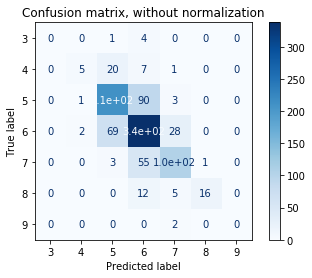

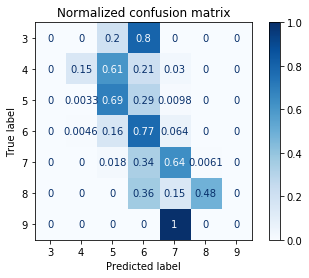

In [10]:
# confusion matrix for Random forest
# Code for plotting from
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_X, test_y,
                                 display_labels=['3','4','5','6','7','8','9'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

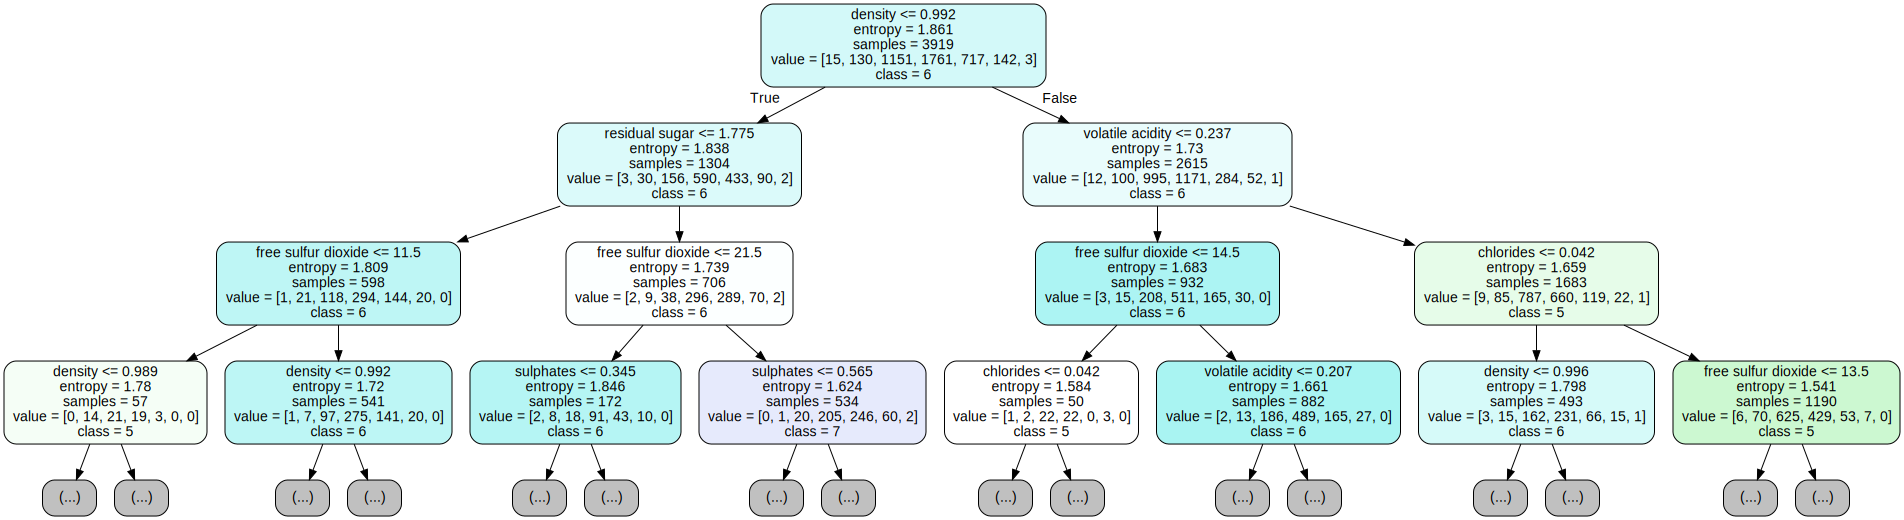

In [11]:
# tree for descision tree
dot_data = tree.export_graphviz(dtc, max_depth=3, filled=True, rounded=True, 
                                 feature_names=train_val_X.columns, 
                                 class_names=['3','4','5','6','7','8','9'])
graph = graphviz.Source(dot_data)
graph

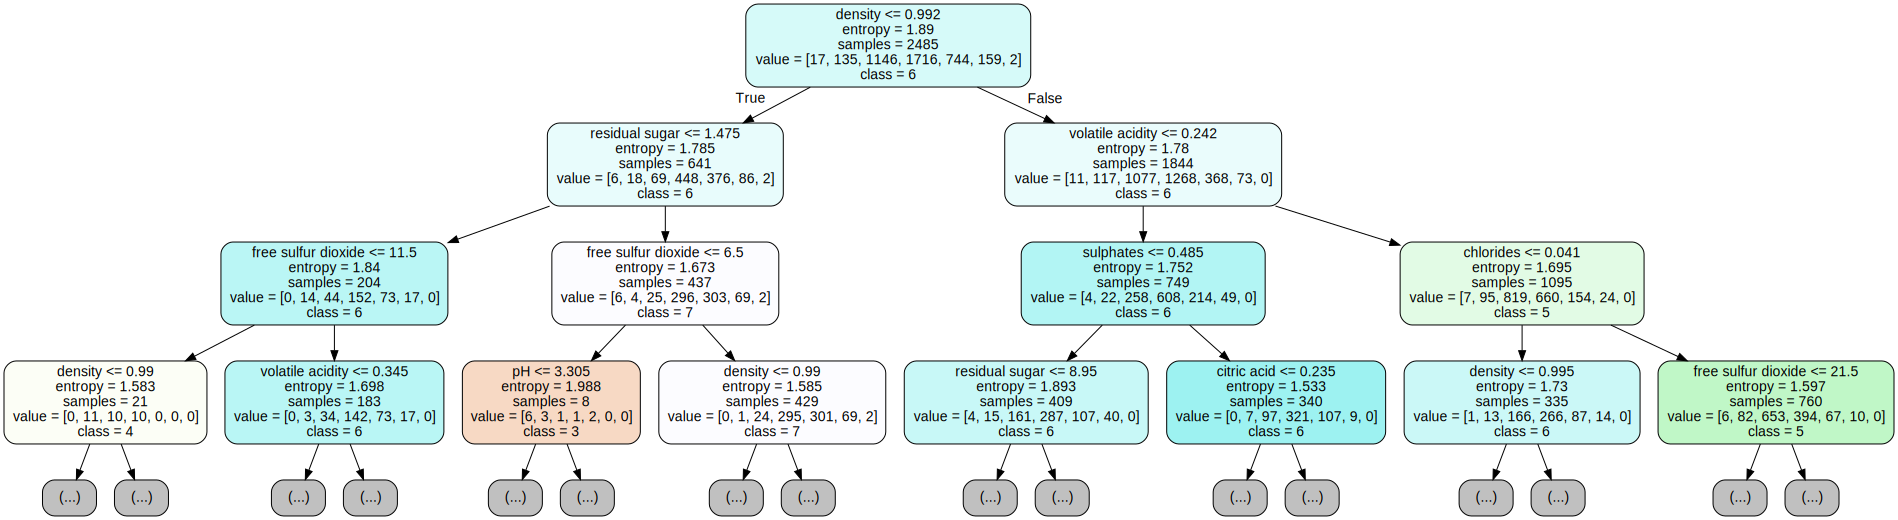

In [12]:
from sklearn.tree import export_graphviz
# tree for the 3rd tree in the random forest
dot_data = export_graphviz(clf.estimators_[3], max_depth=3, filled=True, 
                           rounded=True, feature_names=train_val_X.columns, 
                            class_names=['3','4','5','6','7','8','9'])
graph = graphviz.Source(dot_data)
graph